<a href="https://colab.research.google.com/github/kakhan87/C-Sharp-Apps/blob/master/New_donor_likelihood_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [217]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [218]:
import pandas as pd
import matplotlib.pyplot as plt
print("Libraries imported successfully!")

Libraries imported successfully!


In [219]:
emails_df = pd.read_csv('/content/drive/Shared drives/RA2 TechCareers Model Data/emails.csv')
emails_df.head()

,email_id,broadcaster_id,subject_line,content,sent_time,recipients,opened,clicked,bad,bounced,spam
0,1,1,NATIONBUILDER EMAILS!,"<P>{{ RECIPIENT.FIRST_NAME_OR_FRIEND }},</P>\n...",2018-07-05 21:11:40.536202,2,2,2.0,NaN,NaN,NaN
1,10,7,VOTE DAY!,"<P>DEAR {{ RECIPIENT.FIRST_NAME_OR_FRIEND }},<...",2018-07-11 22:55:34.897952,3,3,NaN,NaN,NaN,NaN
2,100,5,WEEK IN REVIEW,"<P><IMG STYLE=""MARGIN-RIGHT: AUTO; MARGIN-LEFT...",2018-09-16 01:18:10.899794,5592,1856,119.0,1.0,37.0,1.0
3,101,12,ALBERTA PARTY CALGARY NORTH EAST BOARD MEETING...,<P>DEAR {{ RECIPIENT.FIRST_NAME_OR_FRIEND }} -...,2018-09-17 06:02:32.529319,58,31,4.0,NaN,NaN,NaN
4,102,17,MEET THE NOMINEES AND VOTING DAY ANNOUNCEMENT...,<P>HELLO ALBERTA PARTY CONSTITUENTS OF EDMONTO...,2018-09-20 03:25:47.043647,94,42,7.0,NaN,3.0,NaN


## Count Number of NaN Values in Emails Dataframe

In [220]:
emails_df.isna().sum()

email_id            0
broadcaster_id      0
subject_line        0
content             0
sent_time           0
recipients          0
opened              0
clicked           138
bad               428
bounced           227
spam              542
dtype: int64

## Replace NaN Values with 0 in columns showing NaN

In [221]:
cols = ['clicked','bad','bounced','spam']
emails_df[cols] = emails_df[cols].fillna(0)
emails_df.head()

,email_id,broadcaster_id,subject_line,content,sent_time,recipients,opened,clicked,bad,bounced,spam
0,1,1,NATIONBUILDER EMAILS!,"<P>{{ RECIPIENT.FIRST_NAME_OR_FRIEND }},</P>\n...",2018-07-05 21:11:40.536202,2,2,2.0,0.0,0.0,0.0
1,10,7,VOTE DAY!,"<P>DEAR {{ RECIPIENT.FIRST_NAME_OR_FRIEND }},<...",2018-07-11 22:55:34.897952,3,3,0.0,0.0,0.0,0.0
2,100,5,WEEK IN REVIEW,"<P><IMG STYLE=""MARGIN-RIGHT: AUTO; MARGIN-LEFT...",2018-09-16 01:18:10.899794,5592,1856,119.0,1.0,37.0,1.0
3,101,12,ALBERTA PARTY CALGARY NORTH EAST BOARD MEETING...,<P>DEAR {{ RECIPIENT.FIRST_NAME_OR_FRIEND }} -...,2018-09-17 06:02:32.529319,58,31,4.0,0.0,0.0,0.0
4,102,17,MEET THE NOMINEES AND VOTING DAY ANNOUNCEMENT...,<P>HELLO ALBERTA PARTY CONSTITUENTS OF EDMONTO...,2018-09-20 03:25:47.043647,94,42,7.0,0.0,3.0,0.0


## Confirm all NaN values were replaced

In [222]:
emails_df.isna().sum()

email_id          0
broadcaster_id    0
subject_line      0
content           0
sent_time         0
recipients        0
opened            0
clicked           0
bad               0
bounced           0
spam              0
dtype: int64

## Create new dataframe with most important features from emails dataframe
### Sort by descending order of opened emails

In [223]:
emails_df['subject_line_length'] = emails_df['subject_line'].str.len()
emails_processed_df = emails_df[['email_id', 'subject_line', 'subject_line_length', 
                                 'content', 'sent_time', 'recipients', 'opened', 
                                 'clicked']].sort_values(by='opened', ascending=False)
emails_processed_df=emails_processed_df.reset_index(drop=True)
emails_processed_df

,email_id,subject_line,subject_line_length,content,sent_time,recipients,opened,clicked
0,63,POLICY CONFERENCE & AGM,23,"<P>HELLO {{ RECIPIENT.FIRST_NAME_OR_FRIEND }},...",2018-08-21 04:58:13.129920,13495,7086,154.0
1,599,LEADER RESIGNATION - ALBERTA PARTY,34,<P>DEAR {{RECIPIENT.FIRST_NAME_OR_FRIEND}} --<...,2019-06-28 16:35:09.200369,12661,6226,185.0
2,542,DID YOU SEE TODAY'S NUMBERS? 😍,30,"<P>{{RECIPIENT.FIRST_NAME_OR_FRIEND}},</P>\n<P...",2019-04-10 02:18:17.567185,12976,5933,817.0
3,389,RE ELECTIONS ALBERTA,20,"<P>GOOD EVENING,</P>\n<DIV>I WANTED TO INFORM ...",2019-02-09 04:19:21.858935,11981,5924,369.0
4,503,WE DID IT!,10,"<P>HI {{RECIPIENT.FIRST_NAME_OR_FRIEND}},</P>\...",2019-03-26 22:16:22.395828,12360,5691,233.0
...,...,...,...,...,...,...,...,...
604,668,SAVE THE DATE FOR THE ALBERTA PARTY AGM - 2020,46,<P>{{RECIPIENT.FIRST_NAME_OR_FRIEND}} -- <BR><...,2019-12-04 00:03:10.167897,1,1,0.0
605,452,BA BA BLAA,10,<P>{{RECIPIENT.FIRST_NAME_OR_FRIEND}} -- <BR>Y...,2019-03-10 04:34:06.308052,1,1,1.0
606,283,[ALBERTA PARTY] MORE INFORMATION ABOUT DONATING,47,<P>{{RECIPIENT.FIRST_NAME_OR_FRIEND}} -- <BR><...,2018-12-15 19:25:13.876699,3,1,1.0
607,382,"FRANK PENKALA, INTRODUCTION",27,"<P>DEAR {{RECIPIENT.FIRST_NAME_OR_FRIEND}},<BR...",2019-02-05 00:37:44.195829,1,1,1.0


## Plot Number of E-mails Opened Vs. Length of Subject line to check for any correlations

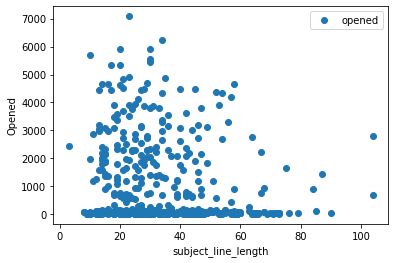

In [224]:
emails_processed_df.plot(x='subject_line_length', y='opened', style='o')
plt.ylabel('Opened')
plt.show()

## Find the features that are most correlated with opening the e-mail

In [225]:
emails_processed_df.corr()['opened'].sort_values()

subject_line_length   -0.164656
email_id               0.088976
clicked                0.660097
recipients             0.965159
opened                 1.000000
Name: opened, dtype: float64

The number of recipients and number of clicks on content inside opened e-mails seem to be the most correlated with number of opened e-mails.

In [273]:
persons_df = pd.read_csv('/content/drive/Shared drives/RA2 TechCareers Model Data/persons.csv')
persons_df

,user_id,do_not_call,do_not_contact,mobile_opt_in,email_opt_in,created_at,amount_donated_in_cent,gender,genderscale,is_member,is_volunteer,city,lat,lng
0,10,False,False,True,True,2018-06-18 03:33:36.877235,50000,MALE,-0.903628,True,True,EDMONTON,53.534261,-113.561948
1,100,False,False,True,True,2018-06-22 04:59:11.094703,0,MALE,-0.993248,True,False,SHERWOODPARK,53.510890,-113.325069
2,1000,False,False,True,False,2018-06-22 04:59:32.324681,0,MALE,-0.508882,True,False,MORINVILLE,53.801988,-113.650435
3,10000,False,False,True,True,2018-06-22 05:04:12.560932,2500,FEMALE,0.497144,True,False,COUNTYOFGRANDEPRAIRIENO,55.140667,-118.763608
4,10001,False,False,True,False,2018-06-22 05:04:12.566468,1000,MALE,NaN,True,False,EDMONTON,53.542243,-113.530470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21061,9993,False,False,True,True,2018-06-22 05:04:12.499741,1000,MALE,-1.000000,True,False,CHESTERMERE,51.008772,-113.795686
21062,9996,False,False,True,True,2018-06-22 05:04:12.518356,1000,FEMALE,0.994761,True,False,SHERWOODPARK,53.503822,-113.320358
21063,9997,False,False,True,True,2018-06-22 05:04:12.521441,1000,MALE,-0.992757,True,False,EDMONTON,53.480952,-113.585462
21064,9998,False,False,True,True,2018-06-22 05:04:12.552018,2500,FEMALE,0.997584,True,False,EDMONTON,53.598738,-113.471605


## Drop Gender features

In [274]:
persons_df.drop(['gender', 'genderscale'], axis = 1, inplace=True)
persons_df

,user_id,do_not_call,do_not_contact,mobile_opt_in,email_opt_in,created_at,amount_donated_in_cent,is_member,is_volunteer,city,lat,lng
0,10,False,False,True,True,2018-06-18 03:33:36.877235,50000,True,True,EDMONTON,53.534261,-113.561948
1,100,False,False,True,True,2018-06-22 04:59:11.094703,0,True,False,SHERWOODPARK,53.510890,-113.325069
2,1000,False,False,True,False,2018-06-22 04:59:32.324681,0,True,False,MORINVILLE,53.801988,-113.650435
3,10000,False,False,True,True,2018-06-22 05:04:12.560932,2500,True,False,COUNTYOFGRANDEPRAIRIENO,55.140667,-118.763608
4,10001,False,False,True,False,2018-06-22 05:04:12.566468,1000,True,False,EDMONTON,53.542243,-113.530470
...,...,...,...,...,...,...,...,...,...,...,...,...
21061,9993,False,False,True,True,2018-06-22 05:04:12.499741,1000,True,False,CHESTERMERE,51.008772,-113.795686
21062,9996,False,False,True,True,2018-06-22 05:04:12.518356,1000,True,False,SHERWOODPARK,53.503822,-113.320358
21063,9997,False,False,True,True,2018-06-22 05:04:12.521441,1000,True,False,EDMONTON,53.480952,-113.585462
21064,9998,False,False,True,True,2018-06-22 05:04:12.552018,2500,True,False,EDMONTON,53.598738,-113.471605


## Count Number of NaN Values in Persons Dataframe

In [275]:
persons_df.isnull().sum()

user_id                      0
do_not_call                  0
do_not_contact               0
mobile_opt_in                0
email_opt_in                 0
created_at                   0
amount_donated_in_cent       0
is_member                    0
is_volunteer                 2
city                      3329
lat                       2475
lng                       2475
dtype: int64

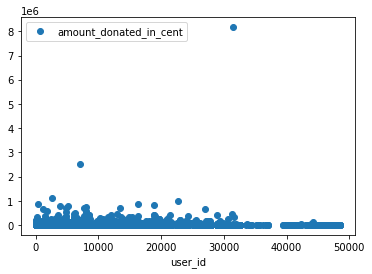

In [277]:
persons_df.plot(x='user_id', y='amount_donated_in_cent', style='o')
plt.show()

In [242]:
interactions_df = pd.read_csv('/content/drive/Shared drives/RA2 TechCareers Model Data/interactions.csv')
interactions_df

,email_id,user_id,sent_time,opened_time,clicked_time,unsubscribed_time,donation_time,donation_amount
0,1,2,2018-07-05 21:11:41.530676,2018-07-05 21:12:01.000000,2018-07-05 21:21:03.313662,NaN,NaN,NaN
1,1,3,2018-07-05 21:11:41.607394,2018-07-05 21:18:00.000000,2018-07-05 21:22:03.155225,NaN,NaN,NaN
2,10,7980,2018-07-11 22:55:37.321770,2018-07-11 23:05:48.000000,NaN,NaN,NaN,NaN
3,10,2,2018-07-11 22:55:36.801788,2018-07-12 00:05:51.000000,NaN,NaN,NaN,NaN
4,10,3,2018-07-11 22:55:37.213009,2018-07-11 22:55:46.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1044764,98,16374,2018-09-15 16:34:25.023406,NaN,NaN,NaN,NaN,NaN
1044765,98,13759,2018-09-15 16:34:12.401455,NaN,NaN,NaN,NaN,NaN
1044766,98,12780,2018-09-15 16:34:17.888160,NaN,NaN,NaN,NaN,NaN
1044767,98,1699,2018-09-15 16:34:28.065986,NaN,NaN,NaN,NaN,NaN


## Count Number of NaN Values in Interactions Dataframe

In [243]:
interactions_df.isnull().sum()

email_id                   0
user_id                    0
sent_time                  0
opened_time           676169
clicked_time         1029902
unsubscribed_time    1039456
donation_time        1044313
donation_amount      1044287
dtype: int64

## View DataFrame

## Rank users with most opened e-mails

In [256]:
user_id_count = interactions_df.groupby('user_id').count().sort_values(by='opened_time', ascending=False).reset_index()
user_id_count.rename(columns={'email_id':'email_count','sent_time':'sent_count','opened_time':'opened_count','clicked_time':'clicked_count',
                               'unsubscribed_time':'unsubscribed_count', 'donation_time':'donation_count'}, inplace=True)
user_id_count.drop(['donation_amount'], axis=1, inplace=True)
# Introduce a new column to calculate the percentage of opened e-mails by user
user_id_count['opened_emails_pct'] = (user_id_count['opened_count'] / user_id_count['sent_count']) * 100
user_id_count = user_id_count[['user_id', 'sent_count', 'opened_count', 
                                 'opened_emails_pct', 'clicked_count', 'unsubscribed_count', 
                               'donation_count']]
user_id_count

,user_id,sent_count,opened_count,opened_emails_pct,clicked_count,unsubscribed_count,donation_count
0,6047,214,211,98.598131,9,0,0
1,11533,218,208,95.412844,26,0,1
2,3189,210,206,98.095238,36,0,2
3,7,208,204,98.076923,6,0,1
4,8072,205,204,99.512195,37,0,2
...,...,...,...,...,...,...,...
21061,25230,36,0,0.000000,0,0,0
21062,15130,1,0,0.000000,0,0,0
21063,15125,1,0,0.000000,0,0,0
21064,15120,1,0,0.000000,0,0,0


## Rank most opened e-mails

In [257]:
# email_id_count = interactions_df.groupby('email_id').count().sort_values(by='opened_time', ascending=False).reset_index()
# email_id_count.rename(columns={'user_id':'user_count','sent_time':'sent_count','opened_time':'opened_count','clicked_time':'clicked_count',
#                                'unsubscribed_time':'unsubscribed_count', 'donation_time':'donation_count'}, inplace=True)
# email_id_count.drop(['donation_amount'], axis=1, inplace=True)
# # Introduce a new column to calculate the percentage of opened e-mails by e-mail id
# email_id_count['opened_emails_pct'] = (email_id_count['opened_count'] / email_id_count['sent_count']) * 100
# email_id_count = email_id_count[['email_id', 'user_count', 'sent_count', 'opened_count', 
#                                  'opened_emails_pct', 'clicked_count', 'unsubscribed_count', 
#                                'donation_count']]
# email_id_count